In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [37]:
df = pd.read_csv(r'E:\ML Learning\Python\Scikit_learn\Working Folder\Wine\winequality-white.csv', sep=";") 

In [38]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [39]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [40]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [41]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

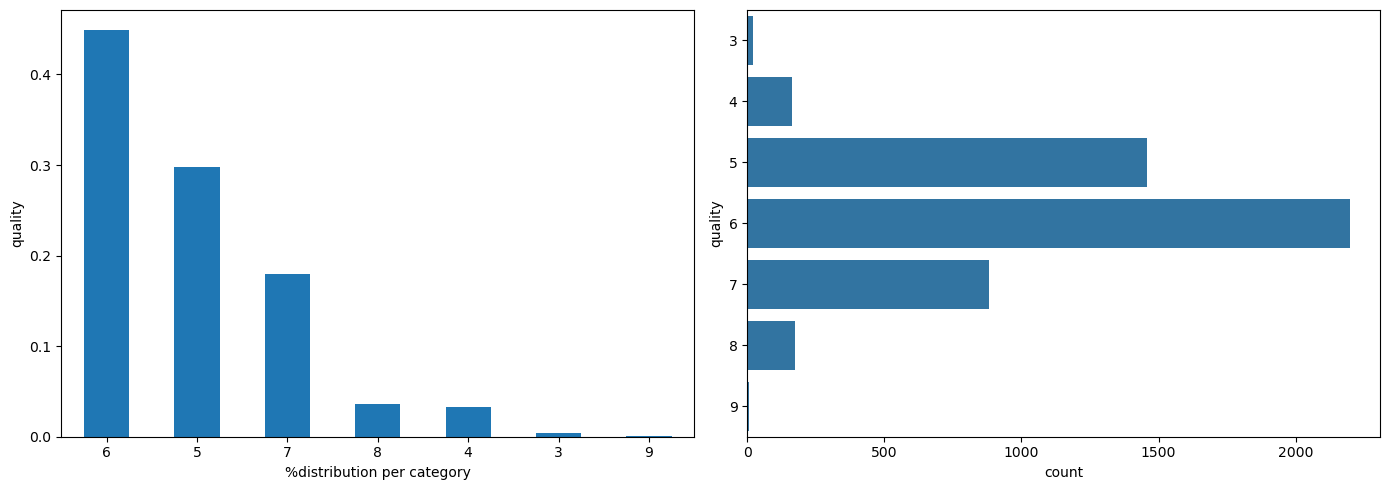

In [42]:
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
df['quality'].value_counts(normalize= True).plot.bar(rot = 0)
plt.ylabel('quality')
plt.xlabel('%distribution per category')
plt.subplot(1,2,2)
sns.countplot(df, y = 'quality')
plt.tight_layout()
plt.show()


In [43]:
df_features = df.drop(columns='quality')


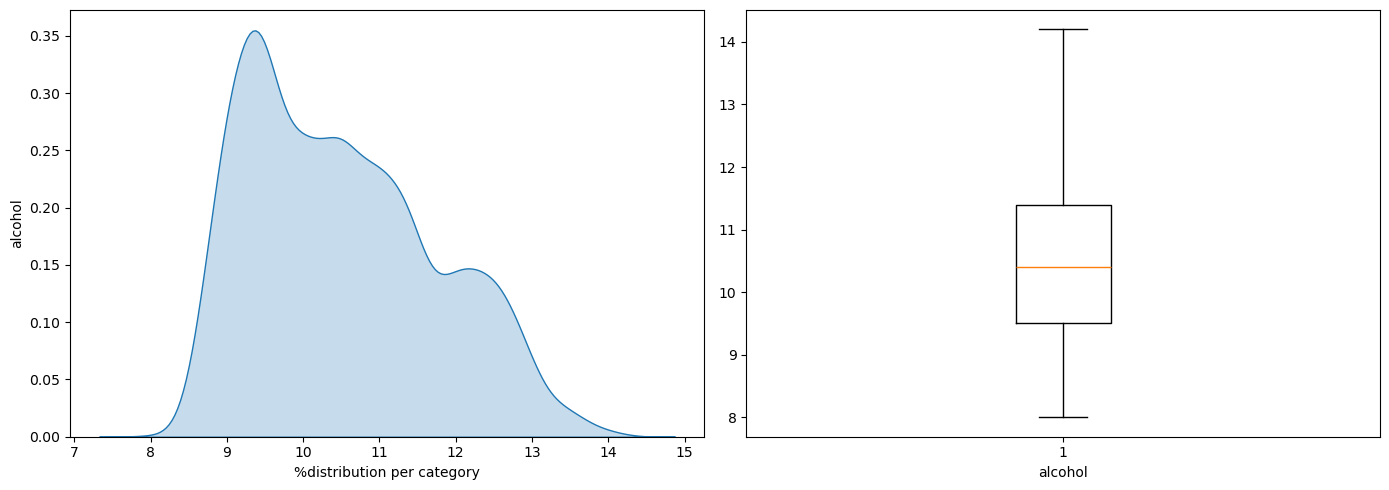

In [44]:
plt.figure(figsize= (14,5))
plt.subplot(1,2,1)
ax = sns.kdeplot(df_features['alcohol'] , fill= True)
plt.ylabel('alcohol')
plt.xlabel('%distribution per category')
plt.subplot(1,2,2)
plt.boxplot(df['alcohol'])
plt.xlabel('alcohol')
plt.tight_layout()
plt.show()

In [45]:
num_columns  = df_features.columns.tolist()

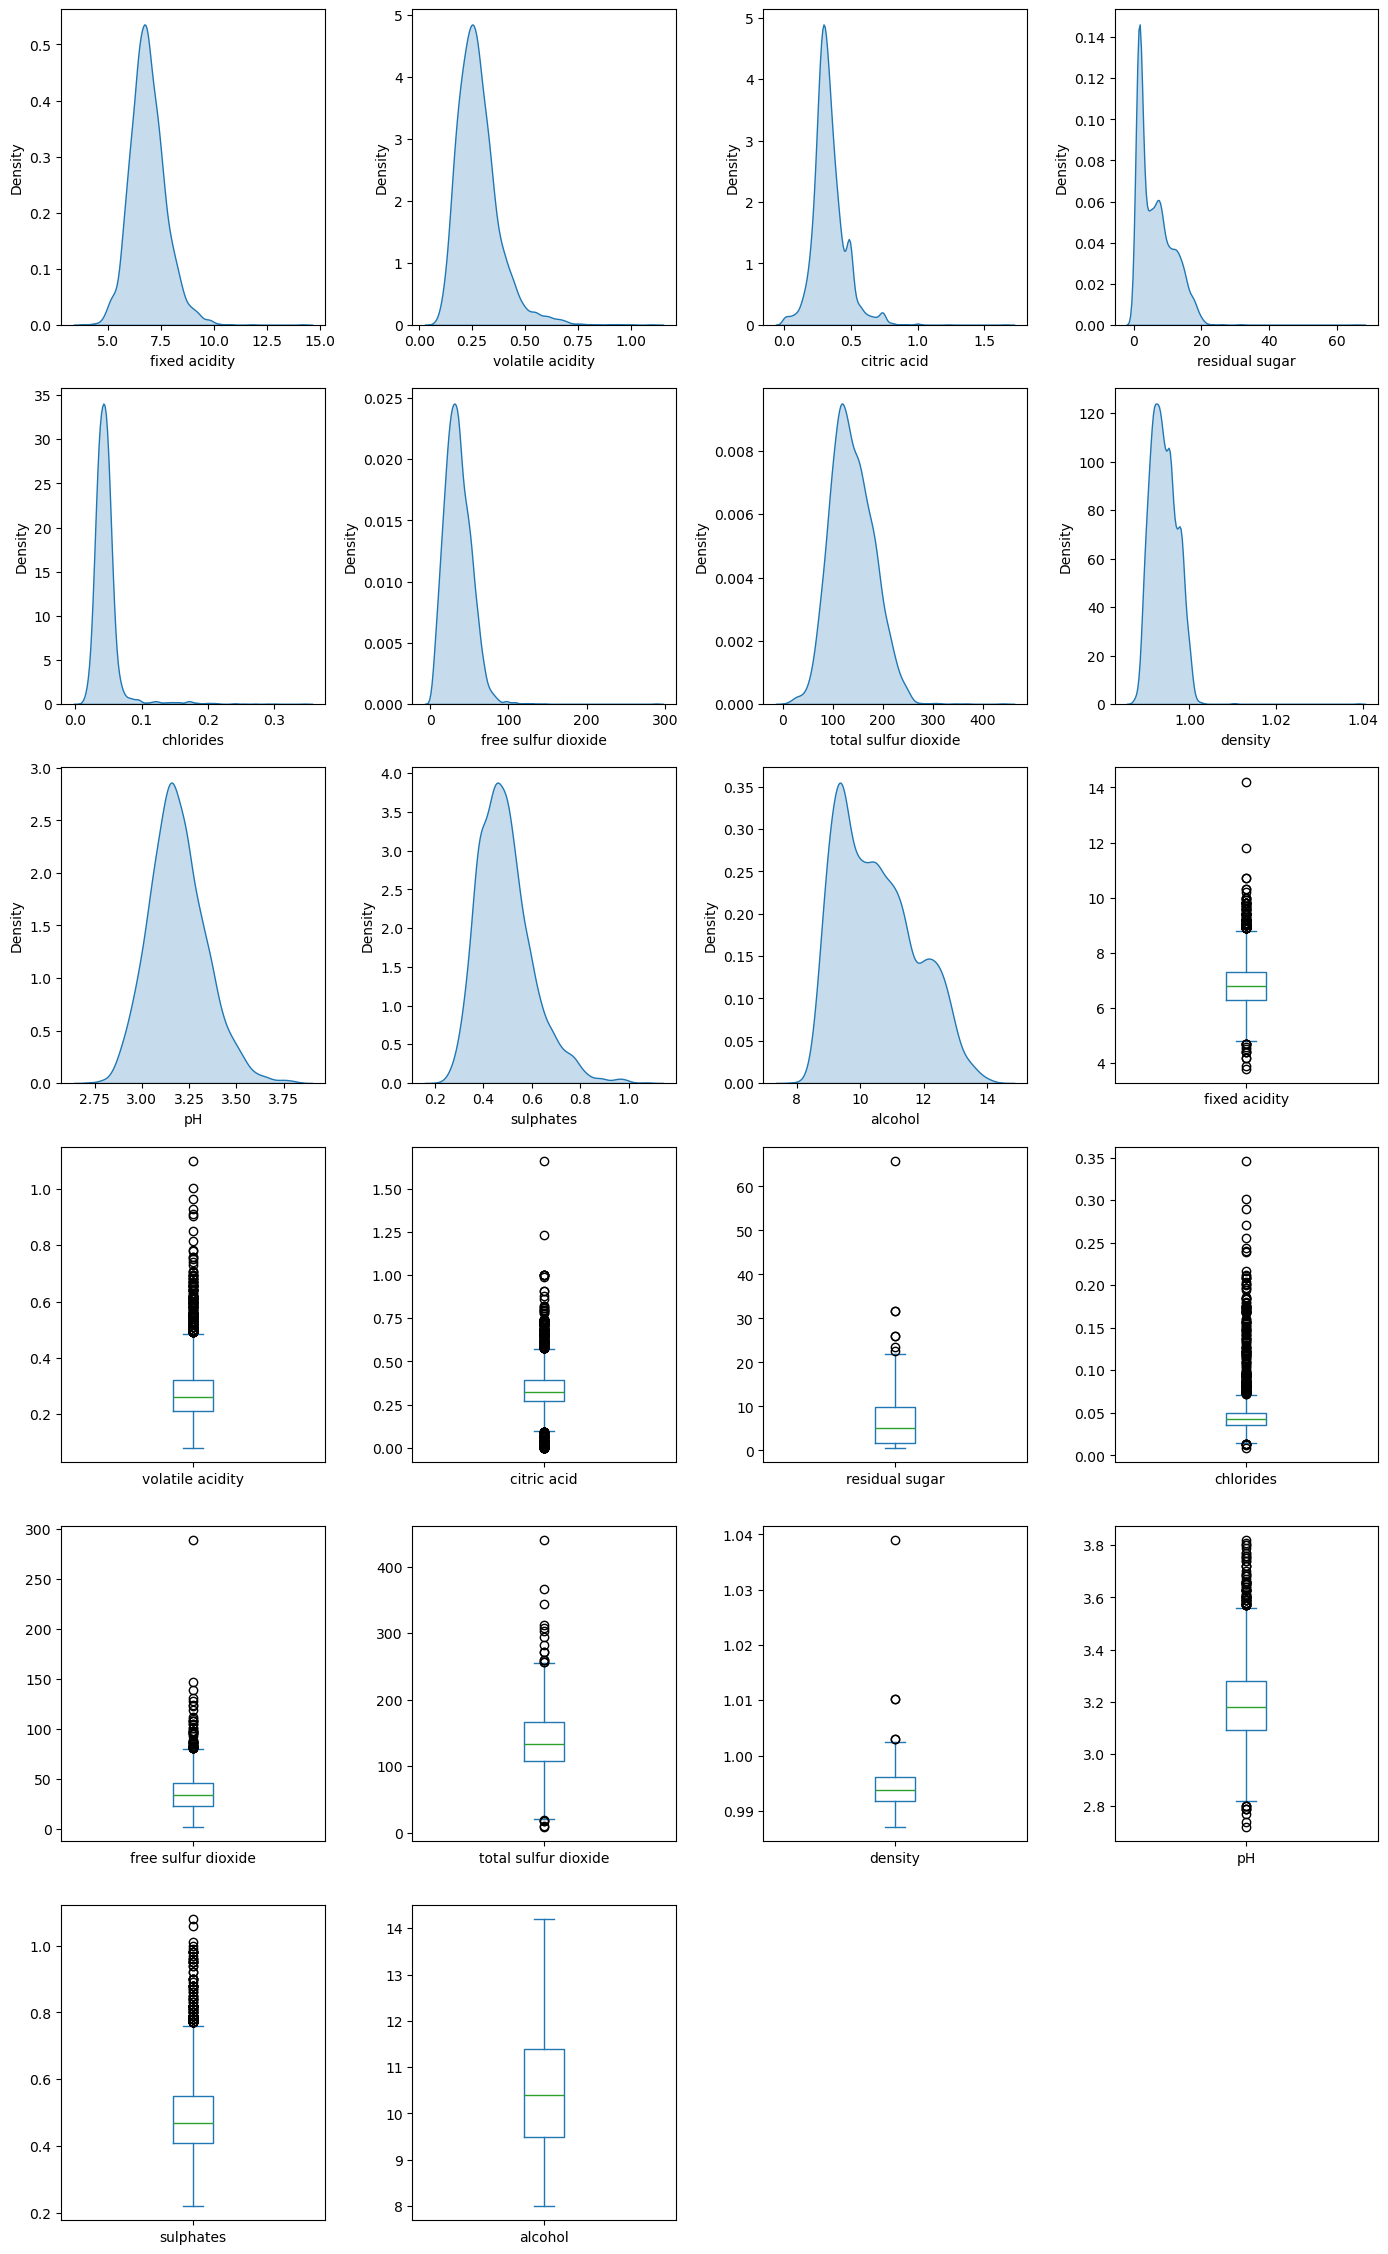

In [46]:
plt.figure(figsize= (14,30))
for i,col in enumerate (num_columns,1) :
    plt.subplot(8,4,i)
    sns.kdeplot(df[col], fill = True)
    plt.subplot(8,4,i+11)
    # plt.boxplot(df[col])
    df[col].plot.box()
plt.tight_layout()
plt.show()

In [47]:
df[num_columns].skew()

fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
dtype: float64

In [48]:
df[num_columns].kurtosis()

fixed acidity            2.172178
volatile acidity         5.091626
citric acid              6.174901
residual sugar           3.469820
chlorides               37.564600
free sulfur dioxide     11.466342
total sulfur dioxide     0.571853
density                  9.793807
pH                       0.530775
sulphates                1.590930
alcohol                 -0.698425
dtype: float64

In [49]:
pd.DataFrame(data = [df[num_columns].skew(), df[num_columns].kurtosis()], index = ['skewness', 'kurtosis'])
# CHLORIDES, FREE SULFUR DIOXIDE, DENSITY ARE SKEWED

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
skewness,0.647751,1.576980,1.281920,1.077094,5.023331,1.406745,0.390710,0.977773,0.457783,0.977194,0.487342
kurtosis,2.172178,5.091626,6.174901,3.469820,37.564600,11.466342,0.571853,9.793807,0.530775,1.590930,-0.698425


<Axes: xlabel='quality', ylabel='sulphates'>

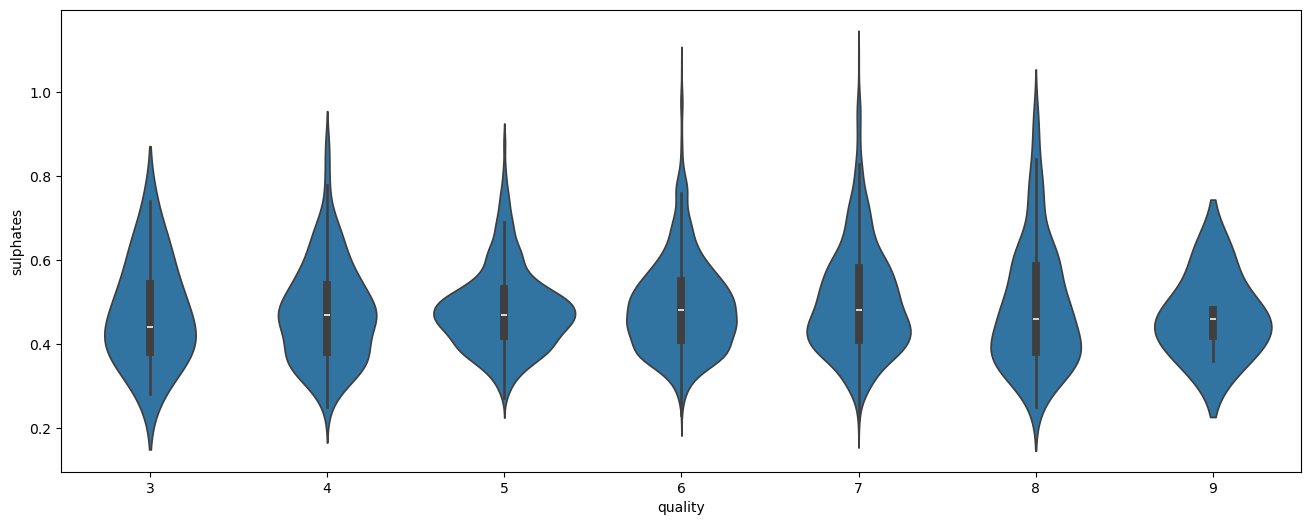

In [50]:
plt.figure(figsize=(16,6))
sns.violinplot(data=df , x='quality', y='sulphates')

In [51]:
plt.figure(figsize=(16,6))
sns.swarmplot(df, x ='quality', y='free sulfur dioxide')

e:\ML Learning\Python\Scikit_learn\.conda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\ML Learning\Python\Scikit_learn\.conda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 78.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\ML Learning\Python\Scikit_learn\.conda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 84.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\ML Learning\Python\Scikit_learn\.conda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\ML Learning\Python\Scikit_learn\.

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

e:\ML Learning\Python\Scikit_learn\.conda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\ML Learning\Python\Scikit_learn\.conda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\ML Learning\Python\Scikit_learn\.conda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\ML Learning\Python\Scikit_learn\.conda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 72.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\ML Learning\Python\Scikit_learn\.

Error in callback <function flush_figures at 0x000001A2B5B68EA0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

c:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 73.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

c:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 74.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


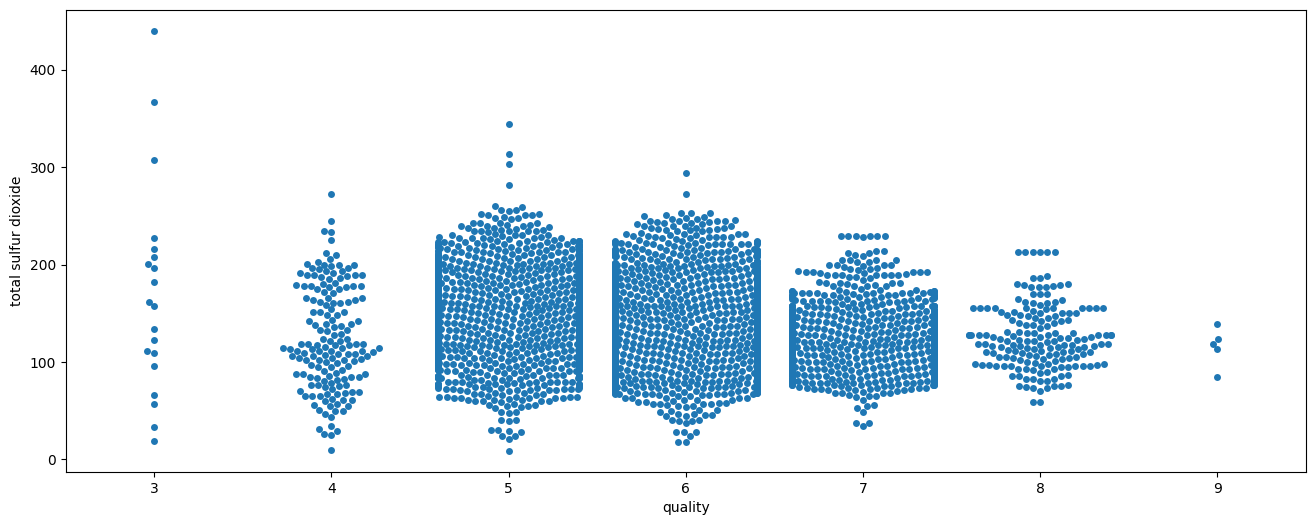

In [ ]:


plt.figure(figsize=(16,6))
sns.swarmplot(x="quality", y="total sulfur dioxide", data=df)



In [ ]:
quality_cat = df.quality.unique()
quality_cat.sort()
qual_TSD = []
for i,quality in enumerate(quality_cat):
  qual_TSD.append([quality, df['total sulfur dioxide'].loc[df['quality'] == quality].mean()])

In [ ]:
df['total sulfur dioxide'].loc[df['quality']]

6    136.0
6    136.0
6    136.0
6    136.0
6    136.0
     ...  
6    136.0
5     97.0
6    136.0
7    170.0
6    136.0
Name: total sulfur dioxide, Length: 4898, dtype: float64

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:


df_qual_TSD = pd.DataFrame(qual_TSD, columns =['Quality', 'Mean TSD'])
df_qual_TSD



,Quality,Mean TSD
0,3,170.600000
1,4,125.279141
2,5,150.904598
3,6,137.047316
4,7,125.114773
5,8,126.165714
6,9,116.000000


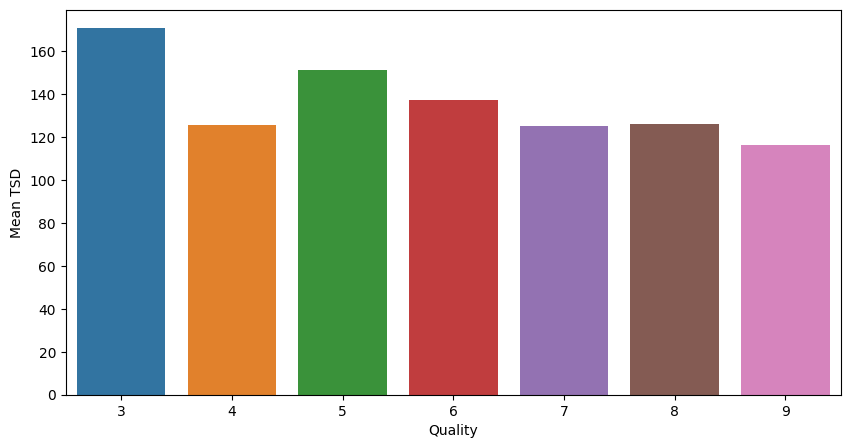

In [ ]:


plt.figure(figsize=(10,5))
sns.barplot(x="Quality", y="Mean TSD", data=df_qual_TSD)
plt.show()



In [ ]:
def alcohol_cat(alcohol):
    if alcohol <= 9.5:
        return "Low"
    elif alcohol <= 11:
        return "Moderate"
    elif alcohol <= 12.5:
        return "High"
    else:
        return "Very High"

df['alcohol_category'] = df['alcohol'].apply(alcohol_cat)

In [ ]:
df.sample(frac=1).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_category
3299,6.8,0.32,0.32,8.7,0.029,31.0,105.0,0.99146,3.00,0.34,12.3,7,High
947,8.5,0.16,0.35,1.6,0.039,24.0,147.0,0.99350,2.96,0.36,10.0,5,Moderate
1734,6.9,0.16,0.30,9.6,0.057,50.0,185.0,0.99780,3.39,0.38,9.6,6,Moderate
138,6.8,0.19,0.36,1.9,0.035,30.0,96.0,0.99170,3.15,0.54,10.8,7,Moderate
4731,5.3,0.31,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,High


<Figure size 1500x3000 with 0 Axes>

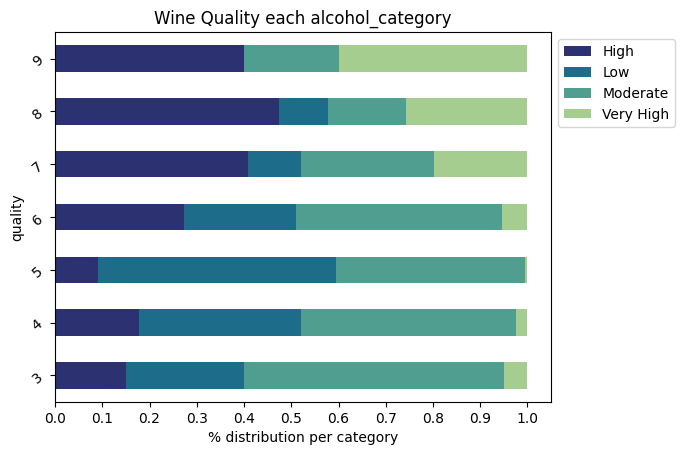

In [ ]:
plt.figure(figsize=(15,30))
cross = pd.crosstab(index=df['quality'],columns=df['alcohol_category'],normalize='index')
cross.plot.barh(stacked = True, rot = 40, cmap = 'crest_r').legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('% distribution per category')
plt.xticks(np.arange(0,1.1,0.1))
plt.title("Wine Quality each {}".format('alcohol_category'))
plt.show()

<AxesSubplot:>

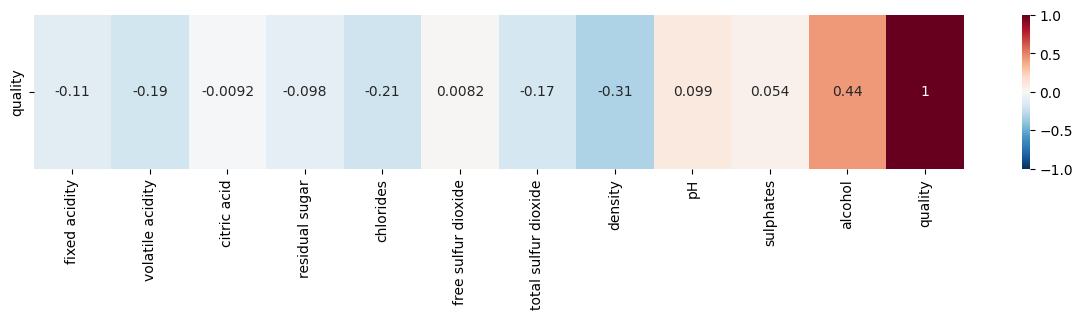

In [ ]:
plt.figure(figsize=(15,2))
sns.heatmap(df.corr().iloc[[-1]],
            cmap='RdBu_r',
            annot=True,
            vmin=-1, vmax=1)

In [52]:
df_label = df['quality']

In [ ]:





#MACHINE LEARNING PART

#MACHINE LEARNING PART

#MACHINE LEARNING PART



In [53]:
df_label = df['quality']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_label, test_size=0.20)

In [55]:


print((len(X_train), len(y_train)))
print((len(X_test), len(y_test)))



(3918, 3918)
(980, 980)
